In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import ImtImagePlugin
import IPython.display as display
import zipfile
from keras.preprocessing.image import ImageDataGenerator
import re

In [4]:
tf.__version__

'2.2.0'

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
dataset_path="/content/gdrive/My Drive/Bird Species/Bird_dataset.zip"
zfile=zipfile.ZipFile(dataset_path)
zfile.extractall()

In [5]:
l1=[]
with zipfile.ZipFile('/content/gdrive/My Drive/Bird Species/Bird_dataset.zip') as z:
    for filename in z.namelist():
        if filename.startswith("train"):
            l1.append(filename)   

l2=[]
for name in l1:
  l2.append(re.split('/', name)) 

class_name=[]
for i in l2:
  class_name.append(i[1])  

class_name = list(dict.fromkeys(class_name))                      

In [6]:
BATCH_SIZE = 32
IMG_HEIGHT = 128
IMG_WIDTH = 128
SHUFFLE_BUFFER_SIZE = 1000
image_count = len(class_name)

In [7]:
trd = ImageDataGenerator(rescale = 1./255,shear_range=0.2,zoom_range=0.2,)
train_data = trd.flow_from_directory(directory="train",
                                      color_mode="rgb",
                                      batch_size=BATCH_SIZE,
                                      shuffle=True,
                                      target_size=(IMG_HEIGHT, IMG_WIDTH),
                                      class_mode="categorical",
                                      classes = class_name
                                    )
tsd = ImageDataGenerator(rescale = 1./255)
test_data = tsd.flow_from_directory(directory="test", 
                                      target_size=(IMG_HEIGHT, IMG_WIDTH),
                                      color_mode="rgb",
                                      batch_size=1,
                                      class_mode=None,
                                      shuffle=False,
                                      classes = class_name
                                    ) 
vd = ImageDataGenerator(rescale = 1./255)
valid_data = vd.flow_from_directory(directory="valid", 
                                      target_size=(IMG_HEIGHT, IMG_WIDTH),
                                      color_mode="rgb",
                                      batch_size=BATCH_SIZE,
                                      class_mode="categorical",
                                      shuffle=True,
                                      classes = class_name
                                    )


Found 27503 images belonging to 200 classes.
Found 1000 images belonging to 200 classes.
Found 1000 images belonging to 200 classes.


In [8]:
image_size=128
IMG_SHAPE=(image_size,image_size,3)

In [9]:
base_model=tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')

In [10]:
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [11]:
base_model.trainable = False

In [12]:
model = tf.keras.Sequential([
                             base_model,
                             tf.keras.layers.GlobalAveragePooling2D(),
                             tf.keras.layers.Dense(200,activation='softmax')
])

In [13]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'] 
              )

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Model) (None, 4, 4, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               256200    
Total params: 2,514,184
Trainable params: 256,200
Non-trainable params: 2,257,984
_________________________________________________________________


In [15]:
epochs= 100
STEPS_PER_EPOCH = np.ceil(train_data.n/BATCH_SIZE)
Validation_steps = np.ceil(valid_data.n/BATCH_SIZE) 
print(STEPS_PER_EPOCH)
print(Validation_steps)

860.0
32.0


In [16]:
history = model.fit(
    train_data,
    steps_per_epoch = STEPS_PER_EPOCH,
    epochs = epochs,
    workers=4,
    validation_data=valid_data,
    validation_steps=Validation_steps
)                       

Epoch 1/100
860/860 [==============================] - 125s 145ms/step - loss: 3.5902 - accuracy: 0.2858 - val_loss: 2.0012 - val_accuracy: 0.6190
Epoch 2/100
860/860 [==============================] - 123s 143ms/step - loss: 1.6995 - accuracy: 0.6387 - val_loss: 1.1328 - val_accuracy: 0.7550
Epoch 3/100
860/860 [==============================] - 124s 144ms/step - loss: 1.1944 - accuracy: 0.7235 - val_loss: 0.8478 - val_accuracy: 0.8040
Epoch 4/100
860/860 [==============================] - 123s 143ms/step - loss: 0.9769 - accuracy: 0.7638 - val_loss: 0.7069 - val_accuracy: 0.8230
Epoch 5/100
860/860 [==============================] - 123s 143ms/step - loss: 0.8674 - accuracy: 0.7842 - val_loss: 0.6285 - val_accuracy: 0.8300
Epoch 6/100
860/860 [==============================] - 122s 142ms/step - loss: 0.7826 - accuracy: 0.8018 - val_loss: 0.5661 - val_accuracy: 0.8430
Epoch 7/100
860/860 [==============================] - 123s 143ms/step - loss: 0.7317 - accuracy: 0.8106 - val_loss: 0

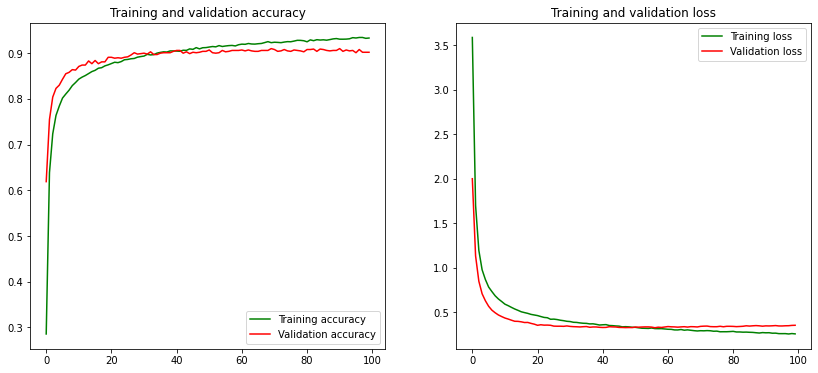

In [17]:
def plot_accuracy_and_loss(history):
    hist = history.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    f, ax = plt.subplots(1,2, figsize=(14,6))
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    plt.show()
plot_accuracy_and_loss(history)

In [18]:
model.save('/content/gdrive/My Drive/Bird Species/Main_MobileNet_bird_species3.h5')